## PyTorch Workflow
lets's explore a an example PyTorch end-to-end workflow

In [217]:
import torch
from torch import nn #nn contains all of pytorch's building block for neural networks
import matplotlib.pyplot as plt
import numpy as np

#check pytorch version
torch.__version__

'2.9.1+cpu'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning
* Excel spreadsheet 
* image of any kind
* music

machine learning is a game of two parts:
1. get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using liner regression

we'll use a liner regression formula to make a straight line with *known* **Parameters**

In [218]:
# Create known parameters 
weights=0.7
bias=0.3

# create 
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
Y=weights * X +bias

#:10 → take rows 0 to 9
X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [219]:
len(X),len(Y)

(50, 50)

In [220]:
X.shape

torch.Size([50, 1])

## splitting data into training and test sets (one of the most import concepts in machine learning in general)

lets create a training and test set with data


In [221]:
# Create Train/test split

train_split=int(0.8*len(X))
x_train,y_train=X[:train_split],Y[:train_split]
x_test,y_test=X[train_split:],Y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)


(40, 40, 10, 10)

In [222]:
x_train,x_test

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]))

### How might we better visualize our data?
This is where the data explorer's motto comes in!
"Visualize"

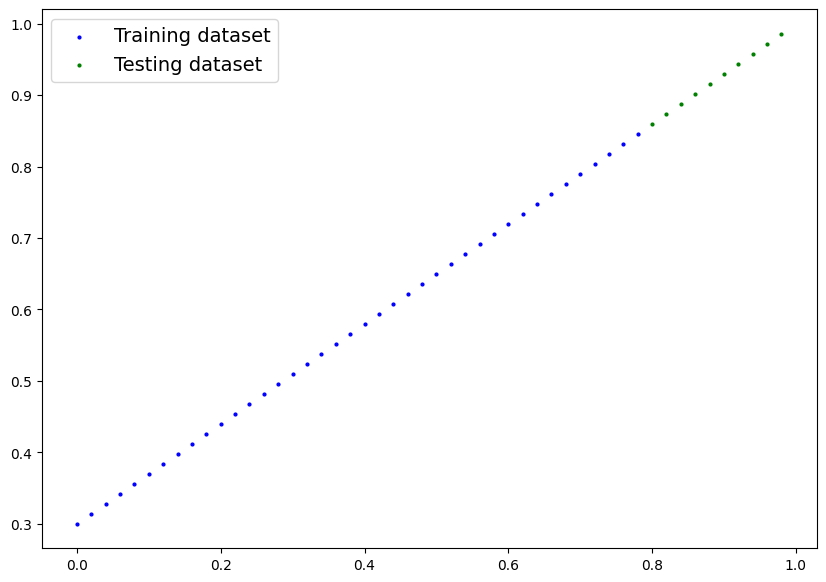

In [223]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None

):
    
    plt.figure(figsize=(10,7))
    #plot the trining data in blue
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training dataset")
    #plot the test data in green
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing dataset")
    # Are there predictions?
    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
    #show the legends
    plt.legend(prop={"size":14}) #prop stand for properties 


plot_predictions()

## Build a model with PyTorch
Our first PyTorch model!

what our model does:
* start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to ) the ideal values (the weight and bias values used to create the data)

how does it do so ?
1. Gradient descent
2. Backpropagation 

In [224]:
class LinerRegressionModel(nn.Module):# <- almost everything in PyTorch inherits nn.module
    def __init__(self):
        super().__init__()
        
        # Initialize model parameters
        self.weights=nn.Parameter(torch.rand(1,# <- start with a random weights and try to adjust it to the ideal weight
                                             requires_grad=True,# <- keep track of the gradient values of the parameter for use with "torch.autogard"" and gradient descent
                                             dtype=torch.float))# <- PyTorch loves the datatype torch.float32
        self.bias=nn.Parameter(torch.rand(1,
                                          requires_grad=True,
                                          dtype=torch.float))
        
        #forward method to define the computation in the model
    def forward(self,x:torch.Tensor)-> torch.Tensor:  # "x" is the inout data
        return self.weights*x + self.bias # this is the liner regression formula 


### Pytorch building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational )
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us 
* torch.nn.Module - this base class for all neural network modules,if you subclass it, you should overwrite forward()
* def forward() - All nn.Module subclass require you to overwrite forward(), this method defines what happens in the forward computation

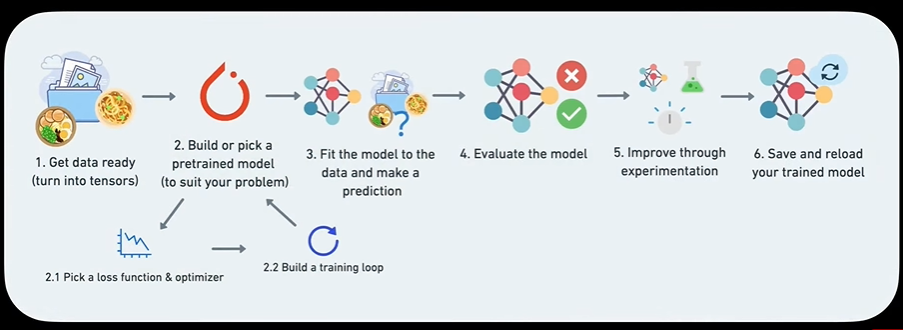

### Checking the content of our PyTorch model


In [225]:
# Create a random seed
# torch.manual_seed(42)

# Create and instance of the model ( this is a subclass of nn.Module)
model_0=LinerRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.2666], requires_grad=True),
 Parameter containing:
 tensor([0.6274], requires_grad=True)]

In [226]:
#List names parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.2666])), ('bias', tensor([0.6274]))])

### Making predictions using `torch.inference_mode()`

to check our model's predictive power let's see how well it predicts `y_test` based on `x_test`.
when we pass data through our model, its's going to run it through the `forward()` method 

In [231]:
y_preds=model_0(x_test)
y_preds

tensor([[0.8407],
        [0.8460],
        [0.8514],
        [0.8567],
        [0.8620],
        [0.8674],
        [0.8727],
        [0.8780],
        [0.8834],
        [0.8887]], grad_fn=<AddBackward0>)

In [ ]:
# make predictions with model

with torch.inference_mode():
    y_pred= model_0(x_test)

# with torch.no_grad():
#     y_pred=model_0(x_test)

y_pred

tensor([[0.8407],
        [0.8460],
        [0.8514],
        [0.8567],
        [0.8620],
        [0.8674],
        [0.8727],
        [0.8780],
        [0.8834],
        [0.8887]])

In [228]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

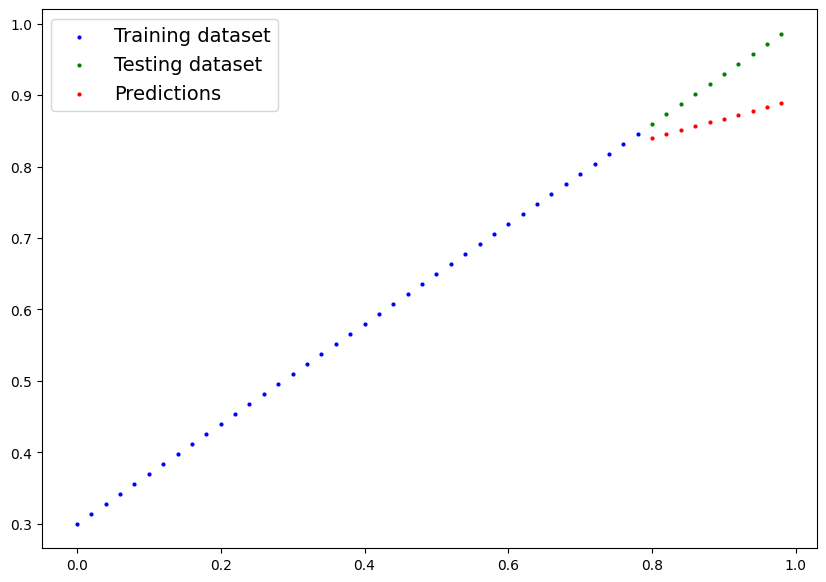

In [229]:
plot_predictions(predictions=y_pred)

## Train model

the whole idea of training is for model to move from some *unknown* parameters (these may be random) to some *known* parameters

or in other words from a poor representation of the data to a better representation of the data

one way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note : Loss function may also be called cost function or criterion in different areas. Four our case, we're going to refer to it as a loss function

Things we need to train:

* **Lose function** A function to measure how wrong your model's predictions are to the ideal output, lower is better
* **Optimizers** Takes into account the loss of a model and adjusts the model's parameters (weights and bias)

And specially for PyTorch, we need:
* A training loop
* A testing loop

In [240]:
model_0.parameters()

<generator object Module.parameters at 0x000002BD3A081540>

In [241]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.2666])), ('bias', tensor([0.6274]))])

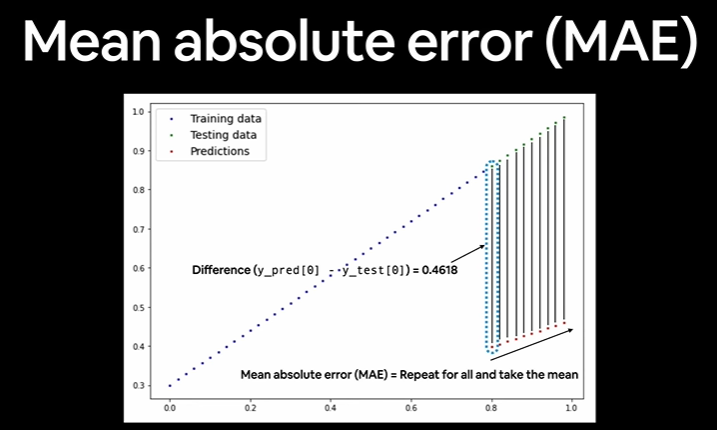

In [242]:
# Setup a loss function
loss_fn=nn.L1Loss

# Setup an optimizer
loss_fn=torch.optim.SGD